<a href="https://colab.research.google.com/github/DeveshValluru/ML-Projects/blob/main/InsurancePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data collection and analysis

In [ ]:
#loading data from csv into pandas dataframe
insurance_dataset = pd.read_csv('/content/insurance.csv')
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_dataset.shape

(1338, 7)

In [ ]:
insurance_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


3 catogorical features in this dataset (smoker, sex,region) we need to change them to numerical values in order to make thhese features fit our ML model

In [ ]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Lets check and see how categorical values are distributed

distribution of the dataset

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


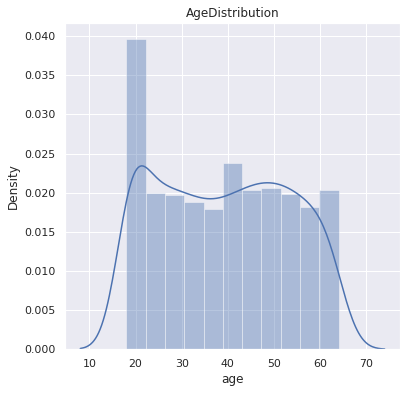

In [ ]:
#diistribution of age value

sns.set()
#mentioning once is enough ans it will be there for entire time and we dont have to use again
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
#distribution plot of age column in insurance dataset

plt.title('AgeDistribution')

plt.show()

from the distribution graph we can see age group  has more density in to 20 to23 range and other age groups are equally distributed

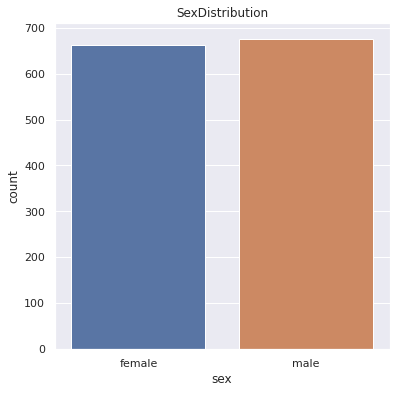

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
#count plot of each type in sex  column in insurance dataset

plt.title('SexDistribution')

plt.show()

male and female are almost equal in number that is distribution is almost equal

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


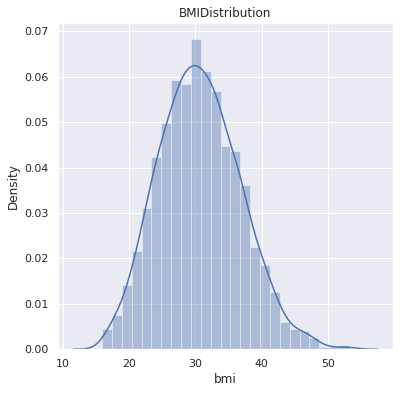

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
#distribution plot of bmi column in insurance dataset

plt.title('BMIDistribution')

plt.show()

bmi is normally distributed and has a range of 18.5 to 24.9

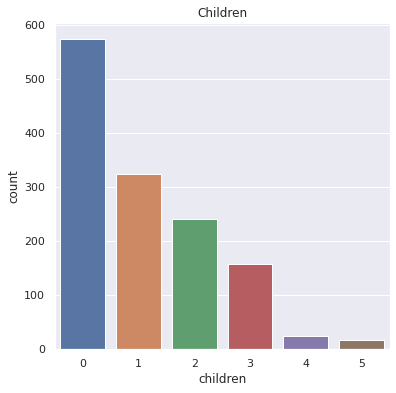

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
#count plot of each type in children  column in insurance dataset

plt.title('Children')

plt.show()

we can also use insurance_dataset['children'].value_Counts() to get the counts of diff values in that column

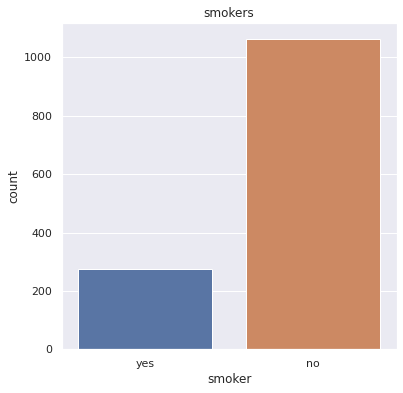

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
#count plot of each type in smoker  column in insurance dataset

plt.title('smokers')

plt.show()

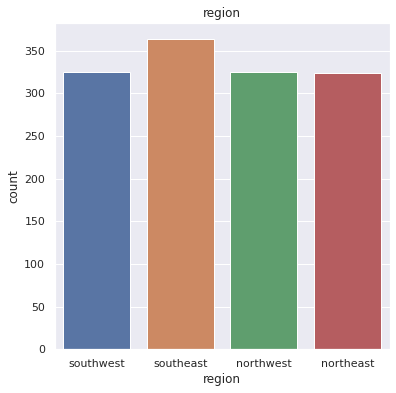

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
#count plot of each type in region  column in insurance dataset

plt.title('region')

plt.show()

In [ ]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


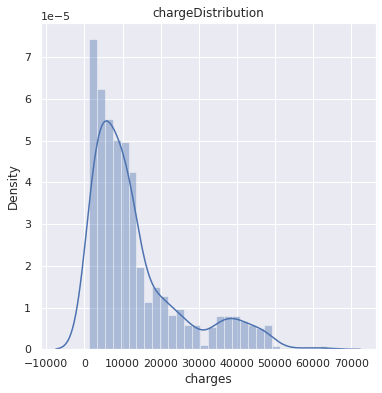

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
#distribution plot of charge column in insurance dataset

plt.title('chargeDistribution')

plt.show()

Data PreProcessing

the graph shows the how the charges is distributed

Encoding the categorical features


thst is turning catogorical data to  appropriate numerical data

In [ ]:
#encoding sex Column

insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)

#encoding smoker Column

insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

#encoding region Column

insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)


In [ ]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


Spliting features and targets

In [ ]:
X = insurance_dataset.drop(columns='charges',axis=1)
Y = insurance_dataset['charges']

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the testing and trianing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
X.shape, X_train.shape, X_test.shape

((1338, 6), (1070, 6), (268, 6))

Model Training 

Linear Regression

In [ ]:
regressor = LinearRegression()


In [ ]:
regressor.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [ ]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


In [ ]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684077


Building a predictive system

In [ ]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3760.0805765]
The insurance cost is USD  3760.080576496064


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
